In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from urllib.parse import urlsplit

In [ ]:
# !wget https://gitlab.com/huseinzol05/Network-Analysis/raw/master/Person_Person.csv

In [2]:
df = pd.read_csv("Person_Person.csv", encoding = "ISO-8859-1")
df.head()

,Person A,Person B,Connection,Source(s)
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...
1,ALLEN WEISSELBERG,JACK WEISSELBERG,Parent/child,https://www.nytimes.com/2016/05/24/business/de...
2,ANAR MAMMADOV,ZIYA MAMMADOV,Parent/child,https://www.meydan.tv/en/site/politics/13787/
3,ANDREW BREMBERG,MIKE FERGUSON,"Bremberg ""is a lifelong friend"" of Ferguson, a...",https://www.statnews.com/2016/11/15/trump-infl...
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...


In [3]:
sources = []
for i in range(df.shape[0]):
    url = u"{0.scheme}://{0.netloc}/".format(urlsplit(df.iloc[i,-1]))
    if url.find('.') > 0:
        sources.append(url)
    else:
        sources.append('general knowledge')
df['sources'] = sources
df.head()

,Person A,Person B,Connection,Source(s),sources
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...,https://www.washingtonpost.com/
1,ALLEN WEISSELBERG,JACK WEISSELBERG,Parent/child,https://www.nytimes.com/2016/05/24/business/de...,https://www.nytimes.com/
2,ANAR MAMMADOV,ZIYA MAMMADOV,Parent/child,https://www.meydan.tv/en/site/politics/13787/,https://www.meydan.tv/
3,ANDREW BREMBERG,MIKE FERGUSON,"Bremberg ""is a lifelong friend"" of Ferguson, a...",https://www.statnews.com/2016/11/15/trump-infl...,https://www.statnews.com/
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...,https://www.linkedin.com/


In [6]:
news_unique, news_count = np.unique(df.sources,return_counts=True)

In [18]:
news_unique = news_unique[np.argsort(news_count)][::-1]
news_count = news_count[np.argsort(news_count)][::-1]

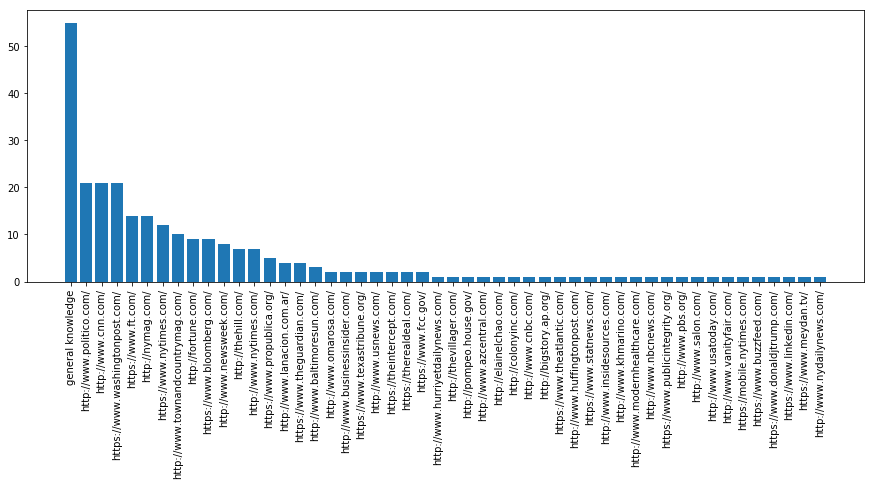

In [25]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(news_count.shape[0]),news_count)
plt.xticks(np.arange(news_count.shape[0]),news_unique,
           rotation='vertical')
plt.show()

In [22]:
np.arange(news_count.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [23]:
news_count

array([55, 21, 21, 21, 14, 14, 12, 10,  9,  9,  8,  7,  7,  5,  4,  4,  3,
        2,  2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [26]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [28]:
data = [go.Bar(
            x=news_unique,
            y=news_count,
    text=news_unique,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'url count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [29]:
A_unique, A_count = np.unique(df['Person A'],return_counts=True)

In [31]:
A_unique = A_unique[np.argsort(A_count)][::-1]
A_count = A_count[np.argsort(A_count)][::-1]

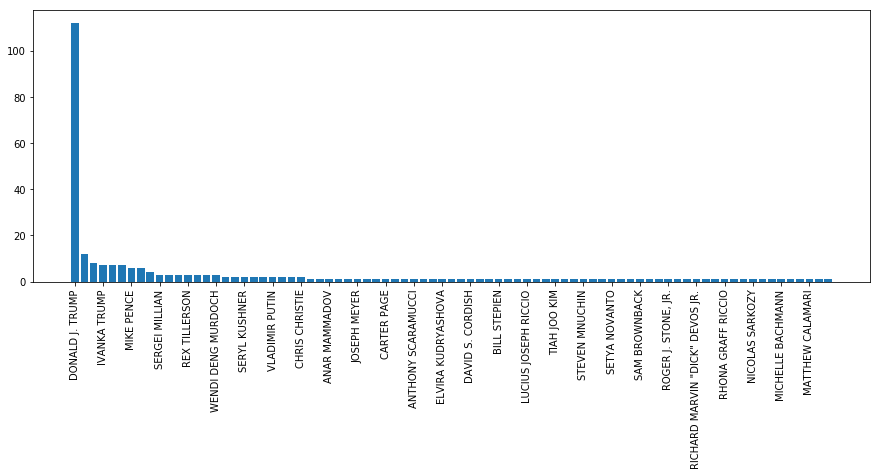

In [35]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(A_count.shape[0]), A_count)
plt.xticks(np.arange(A_count.shape[0])[::3],A_unique[::3],
           rotation='vertical')
plt.show()

In [36]:
G = nx.Graph()

In [37]:
for i in range(df.shape[0]):
    G.add_node(df.iloc[i,0])
    G.add_node(df.iloc[i,1])

In [38]:
for i in range(df.shape[0]):
    G.add_edge(df.iloc[i,0], df.iloc[i,1])

In [44]:
import networkx.drawing.layout as nxlayout
pos = nxlayout.fruchterman_reingold_layout(G,k=2.5/np.sqrt(len(G.nodes())))

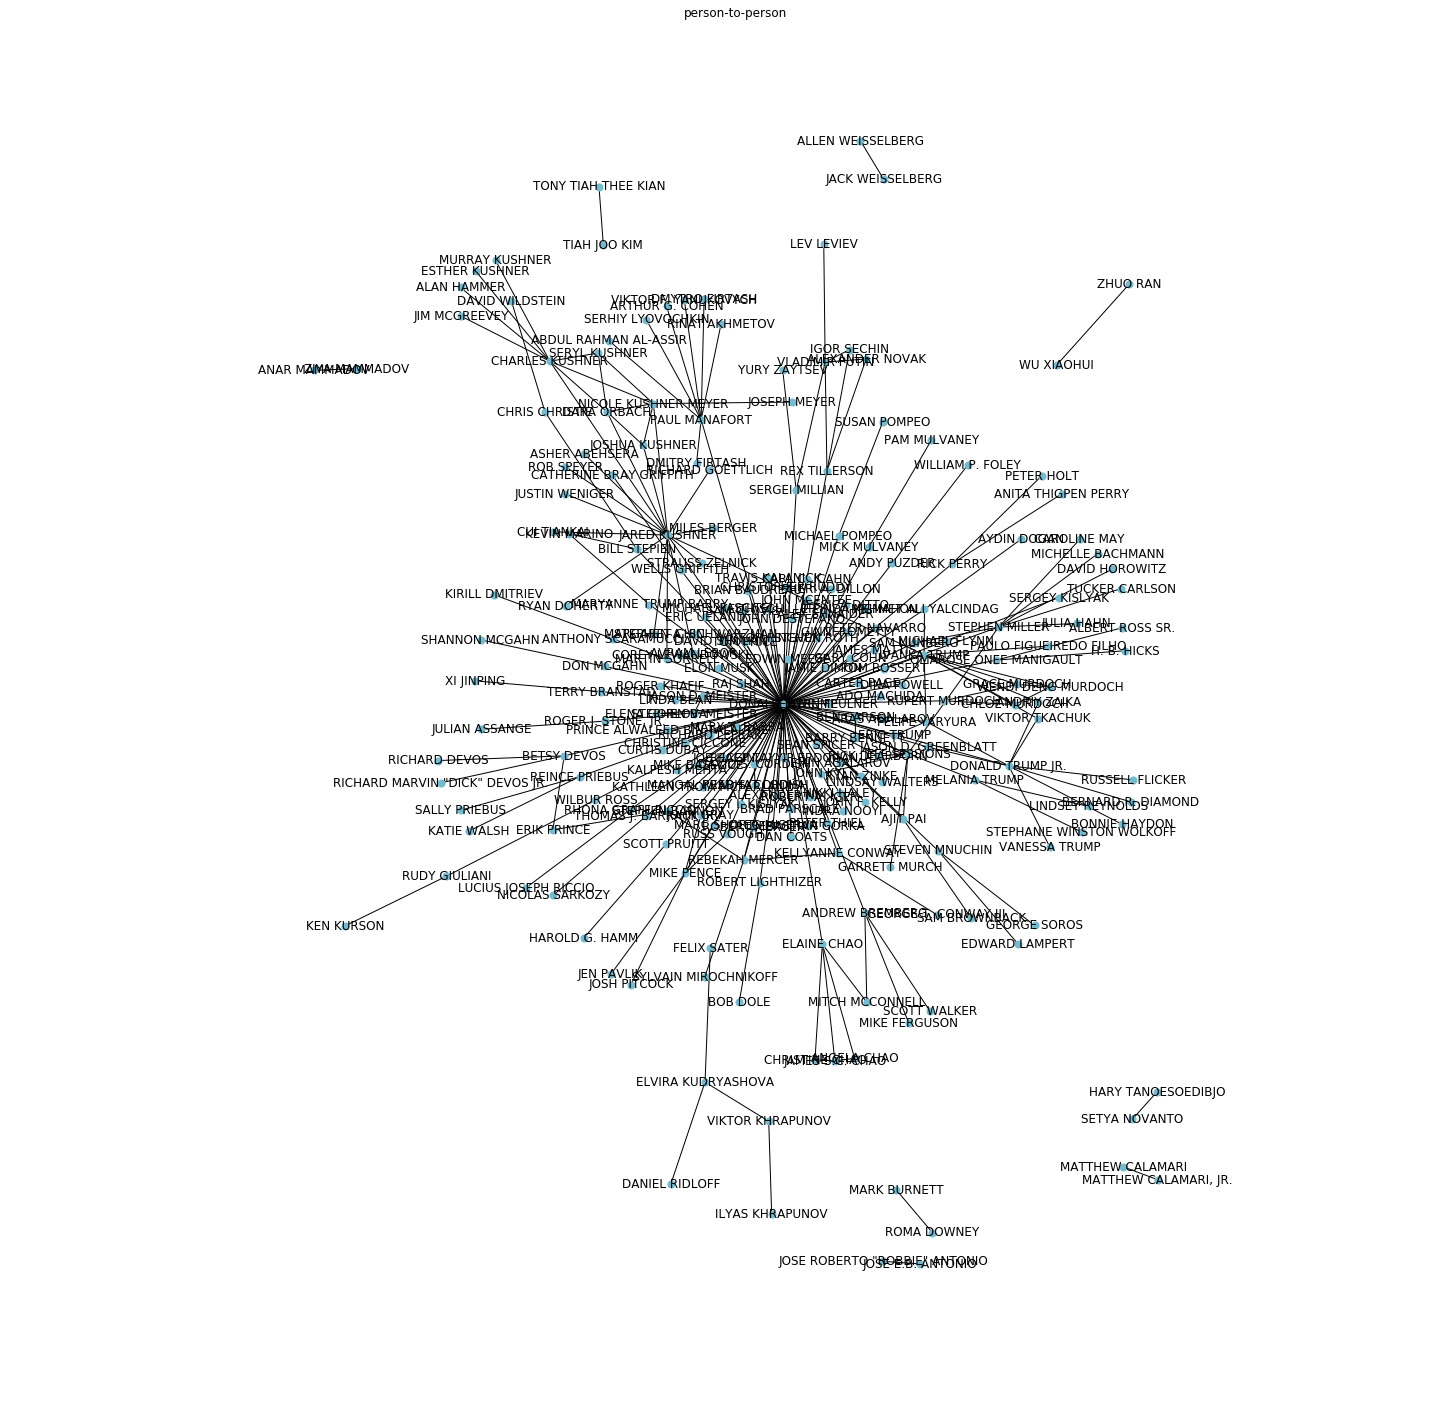

In [45]:
plt.figure(figsize=(25,25))
plt.axis('equal')
plt.title('person-to-person')
nx.draw(G, node_color='#72bbd0', node_size=50, with_labels=True,
        pos=pos)

In [53]:
nodes = list(G.nodes())

In [63]:
nodes.index('DONALD J. TRUMP')

101

In [65]:
nodes[:5]

['ALAN HAMMER',
 'DAN COATS',
 'JOHN KYL',
 'PRINCE ALWALEED BIN TALALTHE',
 'MIKE FERGUSON']

In [58]:
nodes_matrix = np.zeros((len(nodes),len(nodes)))

In [59]:
for i in G.edges:
    nodes_matrix[nodes.index(i[0]),nodes.index(i[1])] += 1

In [66]:
np.sum(nodes_matrix)

264.0

In [67]:
from sklearn.neighbors import NearestNeighbors

In [83]:
neighbors = NearestNeighbors(n_neighbors=50, 
                             algorithm='auto', 
                             metric='cosine').fit(nodes_matrix)

In [84]:
chosen_index = nodes.index('DONALD J. TRUMP')
chosen_index

101

In [85]:
xtest = nodes_matrix[chosen_index, :]
print(xtest.shape)
xtest = xtest.reshape((1,-1))

(232,)


In [86]:
print(xtest.shape)
distances, indices = neighbors.kneighbors(xtest)

(1, 232)


In [87]:
for no, i in enumerate(indices[0]):
    print(nodes[i], (1-distances[0][no]/np.pi/2))

DONALD J. TRUMP 1.0
CHLOE MURDOCH 0.8679413938500072
FELIPE YARYURA 0.8679413938500072
MITCH MCCONNELL 0.8679413938500072
GRACE MURDOCH 0.8629691233768337
REBEKAH MERCER 0.8629691233768337
JEN PAVLIK 0.8600050605050396
RUDY GIULIANI 0.8600050605050396
SAM BROWNBACK 0.8600050605050396
MILES BERGER 0.8600050605050396
MARTIN SORRELL 0.8600050605050396
LINDSEY REYNOLDS 0.8600050605050396
VANESSA TRUMP 0.8600050605050396
PETER HOLT 0.8600050605050396
AYDIN DOGAN 0.8600050605050396
JAMES S.C. CHAO 0.8600050605050396
ERIK PRINCE 0.8600050605050396
KIRILL DMITRIEV 0.8600050605050396
LUCIUS JOSEPH RICCIO 0.8600050605050396
STEPHANIE WINSTON WOLKOFF 0.8600050605050396
GEORGE SOROS 0.8600050605050396
RUSSELL FLICKER 0.8600050605050396
MIKE FERGUSON 0.8600050605050396
WILLIAM P. FOLEY 0.8600050605050396
REED S. CORDISH 0.8600050605050396
VIKTOR F. YANUKOVYCH 0.8600050605050396
JASON D. MEISTER 0.8600050605050396
ERIC TRUMP 0.8600050605050396
ALEXANDER NOVAK 0.8600050605050396
DMYTRO FIRTASH 0.8600